# Filtreler

In [53]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

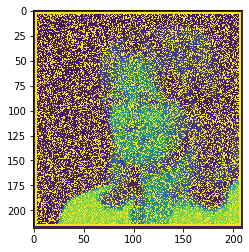

In [54]:
img_noisy = Image.open("images/noisy_test.jpg")
imshow(img_noisy)

## Median(Ortanca Değer) Filtresi
### Tuz-buz gürültüsünden temizleme
Bir pencere boyutu belirlenir ve resim üzerinde gezdirilen pencere içerisindeki piksel değerleri sıralanarak ortadaki değer alınır.

In [61]:
img_noisy_array = np.array(img_noisy)
new_img_array = np.array(img_noisy)

## 3x3 Filtre

In [56]:
def getMedian(li):
    li.sort()
    return li[int(len(li)/2)]

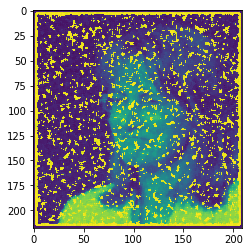

In [57]:
############### 3x3 window ###############
for i in range(1, img_noisy_array.shape[0] - 1):
    for j in range(1, img_noisy_array.shape[1] - 1):
        win = []
        for x in range(i - 1, i + 2):
            for y in range(j - 1, j + 2):
                win.append(img_noisy_array[x][y])

        new_img_array[i][j] = getMedian(win)

imshow(new_img_array)

## 5x5 Filtre

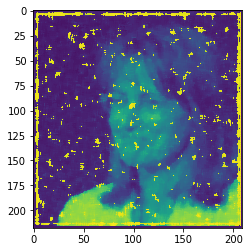

In [62]:
############### 5x5 window ###############
img_noisy_array = np.array(img_noisy)
new_img_array = np.array(img_noisy)

for i in range(1, img_noisy_array.shape[0] - 2):
    for j in range(1, img_noisy_array.shape[1] - 2):
        win = []
        for x in range(i - 2, i + 3):
            for y in range(j - 2, j + 3):
                win.append(img_noisy_array[x][y])
        #sort the values
        win.sort()
        
        new_img_array[i][j] = getMedian(win)

imshow(new_img_array)

## Mean (Ortalama) Filtresi
Resim üzerinde gezdirilen pencere içerisindeki piksel değerlerinin ortalaması alınır.

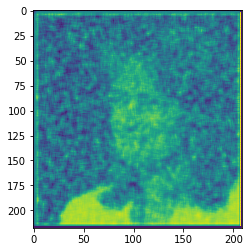

In [67]:
############### 5x5 window ###############
img_noisy_array = np.array(img_noisy)
new_img_array = np.array(img_noisy)


for i in range(1, img_noisy_array.shape[0] - 2):
    for j in range(1, img_noisy_array.shape[1] - 2):
        win = []
        for x in range(i - 2, i + 3):
            for y in range(j - 2, j + 3):
                win.append(img_noisy_array[x][y])
                
        new_img_array[i][j] = (np.sum(win))/(5*5)

imshow(new_img_array)